# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/02_dot_and_inner_products`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/02_dot_and_inner_products/02_vector_dot_products.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# 2. Vector Dot Products: Applications and Examples

This example expands on vector dot products and explores their applications in various domains.

Dot products are fundamental operations that enable us to:

- Calculate similarity between vectors (like in recommendation systems)
- Determine projections of one vector onto another
- Compute work done by a force in physics
- Implement features like keyword search and image recognition

In this tutorial, we'll explore practical applications of dot products.


## 2.1 Setup and Imports


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Create a nicer colormap for visualizing vectors and matrices
colors = [(0.8, 0.8, 1), (0.1, 0.3, 0.8)]  # Light blue to darker blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)


## 2.2 Document Similarity with Dot Products

One of the most common applications of dot products is in measuring similarity between documents or text. 
In this simple example, we'll create document vectors using a bag-of-words approach and 
calculate similarity between documents.


In [2]:
# Create a simple vocabulary
vocabulary = ["matrix", "vector", "tensor", "neural", "network", "deep", "learning", "algorithm"]

# Define some simple documents
documents = [
    "neural network deep learning",
    "matrix vector tensor operations",
    "deep learning neural network algorithm",
    "tensor matrix vector calculation"
]

# Create document vectors (bag of words)
def create_document_vector(doc, vocab):
    """Convert a document to a vector based on word occurrences."""
    vector = torch.zeros(len(vocab))
    for i, word in enumerate(vocab):
        vector[i] = doc.lower().count(word)
    return vector

# Create document vectors
document_vectors = [create_document_vector(doc, vocabulary) for doc in documents]


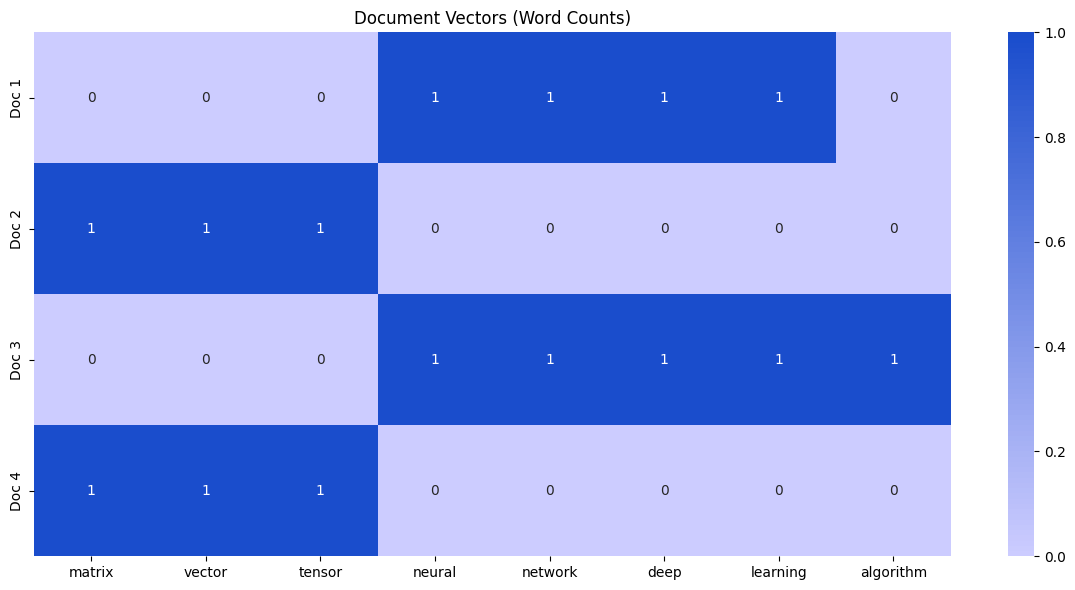

In [3]:
# Display the document vectors as a heatmap
plt.figure(figsize=(12, 6))
doc_matrix = torch.stack(document_vectors)
sns.heatmap(doc_matrix.numpy(), annot=True, fmt=".0f", cmap=cmap,
            xticklabels=vocabulary, yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("Document Vectors (Word Counts)")
plt.tight_layout()
plt.show()


In [4]:
# Calculate similarity matrix using dot products
similarity_matrix = torch.zeros((len(documents), len(documents)))

for i in range(len(documents)):
    for j in range(len(documents)):
        v1 = document_vectors[i]
        v2 = document_vectors[j]
        
        # Calculate cosine similarity using dot product
        # cos_sim = dot(v1, v2) / (||v1|| * ||v2||)
        dot_product = torch.dot(v1, v2)
        norm_product = torch.norm(v1) * torch.norm(v2)
        
        # Avoid division by zero
        if norm_product > 0:
            similarity_matrix[i, j] = dot_product / norm_product
        else:
            similarity_matrix[i, j] = 0


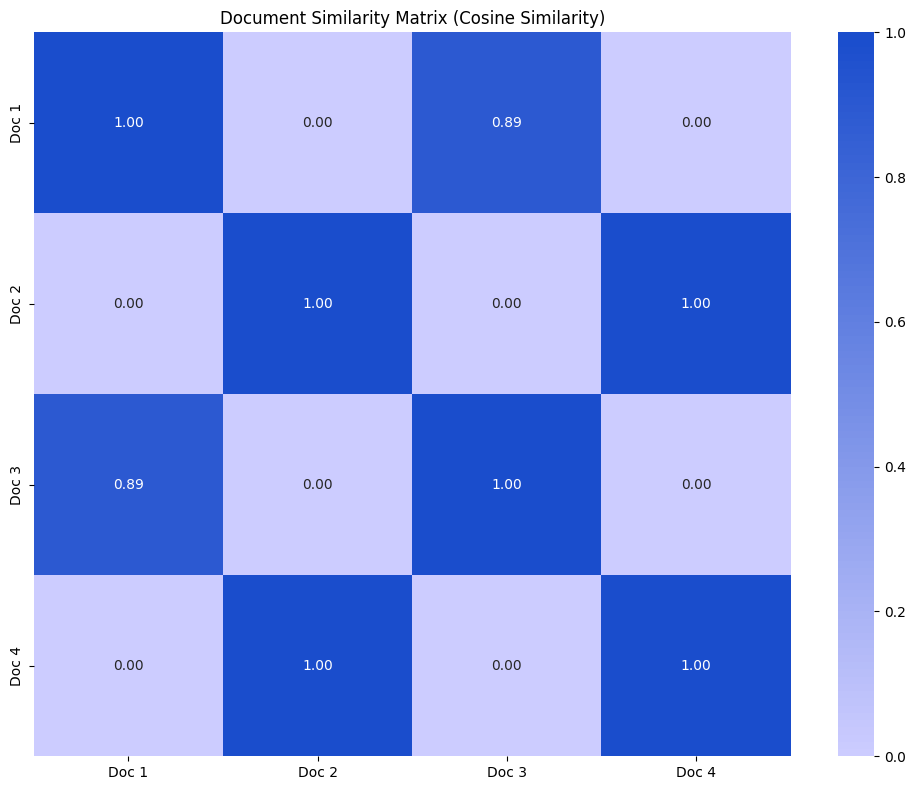

In [5]:
# Visualize the similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix.numpy(), annot=True, fmt=".2f", cmap=cmap,
            xticklabels=[f"Doc {i+1}" for i in range(len(documents))],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("Document Similarity Matrix (Cosine Similarity)")
plt.tight_layout()
plt.show()


In [6]:
# Interpret the results
print("Document contents:")
for i, doc in enumerate(documents):
    print(f"Document {i+1}: {doc}")

print("\nSimilarity interpretation:")
for i in range(len(documents)):
    most_similar_idx = torch.argmax(similarity_matrix[i, :]).item()
    if most_similar_idx != i:  # Exclude self-similarity
        similarity = similarity_matrix[i, most_similar_idx].item()
        print(f"Document {i+1} is most similar to Document {most_similar_idx+1} with similarity {similarity:.2f}")


Document contents:
Document 1: neural network deep learning
Document 2: matrix vector tensor operations
Document 3: deep learning neural network algorithm
Document 4: tensor matrix vector calculation

Similarity interpretation:
Document 4 is most similar to Document 2 with similarity 1.00


## 2.3 Image Patterns with Dot Products

Dot products are also used in image processing for pattern matching. Let's create a simple example
where we use dot products to detect patterns in images.


In [7]:
# Create a small image and a pattern to search for
def create_sample_image(size=8):
    """Create a random binary image with a specific pattern."""
    image = torch.zeros((size, size))
    
    # Add random noise
    image = torch.rand_like(image) > 0.8
    
    # Add a specific pattern at a location
    pattern = torch.tensor([
        [1, 1],
        [1, 1]
    ]).float()
    
    # Insert pattern at position (2, 3)
    image[2:4, 3:5] = pattern
    
    return image.float()


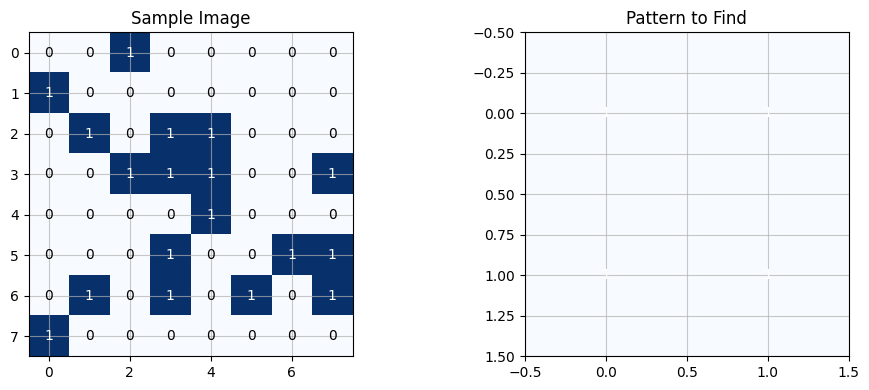

In [8]:
# Create an image and a pattern to search for
sample_image = create_sample_image(8)
pattern = torch.tensor([
    [1, 1],
    [1, 1]
]).float()

# Visualize the image and pattern
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.imshow(sample_image, cmap='Blues')
ax1.set_title("Sample Image")
ax1.grid(True, linestyle='-', alpha=0.7)
for i in range(sample_image.shape[0]):
    for j in range(sample_image.shape[1]):
        ax1.text(j, i, f"{int(sample_image[i, j])}", 
                 ha="center", va="center", 
                 color="black" if sample_image[i, j] < 0.5 else "white")

ax2.imshow(pattern, cmap='Blues')
ax2.set_title("Pattern to Find")
ax2.grid(True, linestyle='-', alpha=0.7)
for i in range(pattern.shape[0]):
    for j in range(pattern.shape[1]):
        ax2.text(j, i, f"{int(pattern[i, j])}", 
                 ha="center", va="center", 
                 color="black" if pattern[i, j] < 0.5 else "white")

plt.tight_layout()
plt.show()


In [9]:
# Perform pattern matching using dot products
def pattern_match(image, pattern):
    """Match a pattern in an image using sliding dot products."""
    h_img, w_img = image.shape
    h_pat, w_pat = pattern.shape
    
    # Output activation map
    result = torch.zeros((h_img - h_pat + 1, w_img - w_pat + 1))
    
    # Flatten the pattern for dot product
    pattern_flat = pattern.flatten()
    pattern_size = torch.sum(pattern)
    
    # Slide pattern over the image
    for i in range(h_img - h_pat + 1):
        for j in range(w_img - w_pat + 1):
            # Extract image patch
            patch = image[i:i+h_pat, j:j+w_pat].flatten()
            
            # Calculate dot product for similarity
            dot_prod = torch.dot(patch, pattern_flat)
            
            # Normalize by pattern size for better comparison
            result[i, j] = dot_prod / pattern_size
    
    return result


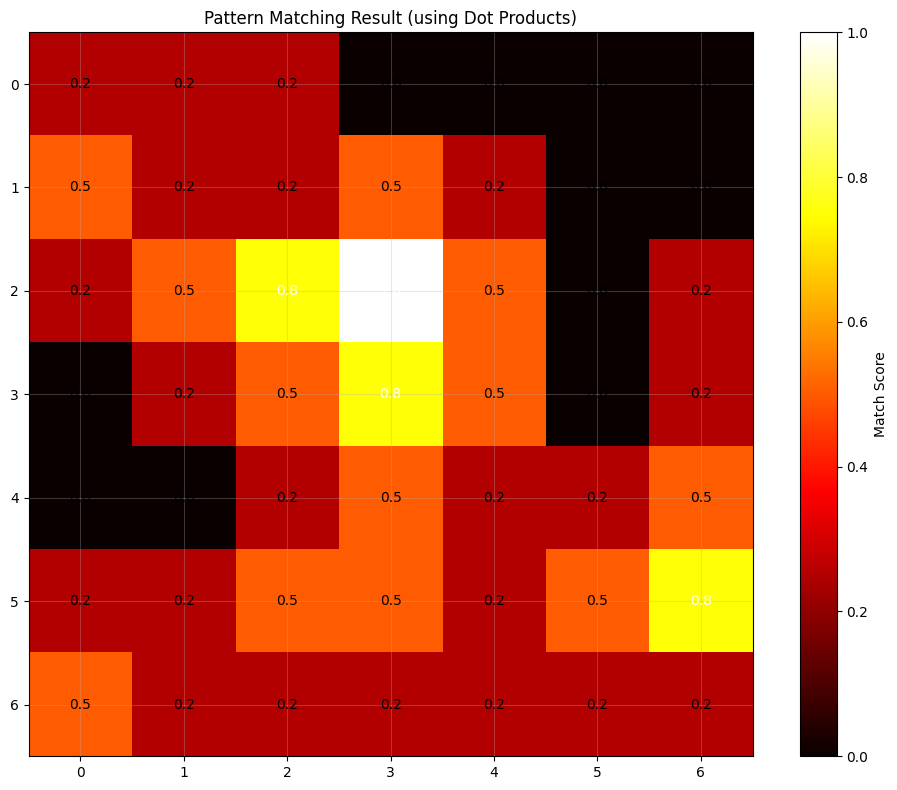

In [10]:
# Run pattern matching and visualize results
match_result = pattern_match(sample_image, pattern)

plt.figure(figsize=(10, 8))
plt.imshow(match_result, cmap='hot')
plt.colorbar(label="Match Score")
plt.title("Pattern Matching Result (using Dot Products)")

# Add grid and values
plt.grid(True, linestyle='-', alpha=0.3)
for i in range(match_result.shape[0]):
    for j in range(match_result.shape[1]):
        plt.text(j, i, f"{match_result[i, j]:.1f}", 
                 ha="center", va="center", 
                 color="black" if match_result[i, j] < 0.7 else "white")

plt.tight_layout()
plt.show()


Best match found at position: (2, 3)
Match score: 1.00


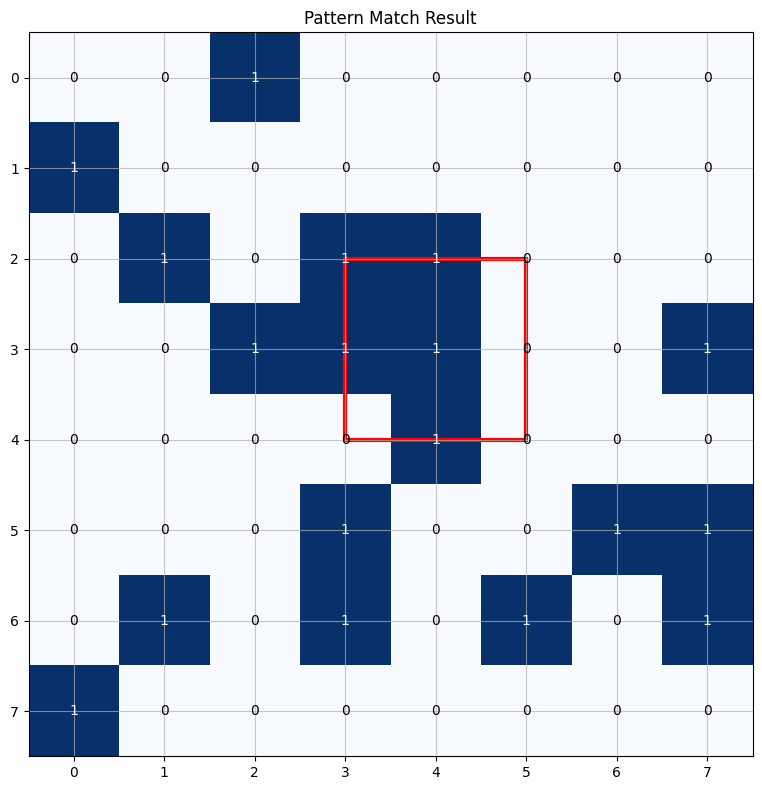

In [11]:
# Find the best match location
best_match_idx = torch.argmax(match_result.flatten()).item()
best_match_row = best_match_idx // match_result.shape[1]
best_match_col = best_match_idx % match_result.shape[1]

print(f"Best match found at position: ({best_match_row}, {best_match_col})")
print(f"Match score: {match_result[best_match_row, best_match_col]:.2f}")

# Highlight the match in the original image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(sample_image, cmap='Blues')
ax.add_patch(plt.Rectangle((best_match_col, best_match_row), 
                          pattern.shape[1], pattern.shape[0], 
                          fill=False, edgecolor='red', linewidth=3))

ax.set_title("Pattern Match Result")
ax.grid(True, linestyle='-', alpha=0.7)
for i in range(sample_image.shape[0]):
    for j in range(sample_image.shape[1]):
        ax.text(j, i, f"{int(sample_image[i, j])}", 
                ha="center", va="center", 
                color="black" if sample_image[i, j] < 0.5 else "white")

plt.tight_layout()
plt.show()


## 2.4 Physics: Work and Force Vectors

In physics, the dot product calculates the work done by a force along a displacement:

$$\text{Work} = \vec{F} \cdot \vec{d} = ||\vec{F}|| \cdot ||\vec{d}|| \cdot \cos(\theta)$$

Let's visualize this concept:


In [12]:
def visualize_work(force, displacement, figsize=(10, 8)):
    """
    Visualize work as the dot product of force and displacement vectors.
    
    Args:
        force: Force vector (PyTorch tensor)
        displacement: Displacement vector (PyTorch tensor)
        figsize: Figure size
    """
    # Convert to numpy
    F = force.detach().cpu().numpy()
    d = displacement.detach().cpu().numpy()
    
    # Calculate work using dot product
    work = np.dot(F, d)
    
    # Calculate magnitudes and angle
    mag_F = np.linalg.norm(F)
    mag_d = np.linalg.norm(d)
    cos_theta = work / (mag_F * mag_d)
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_deg = np.degrees(angle)
    
    # Calculate the projection of force onto displacement
    proj_scalar = work / mag_d
    proj_vector = (proj_scalar / mag_d) * d
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Find the maximum magnitude for setting axis limits
    max_mag = max(mag_F, mag_d) * 1.5
    
    # Set axis limits and grid
    ax.set_xlim(-max_mag/2, max_mag)
    ax.set_ylim(-max_mag/2, max_mag)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Starting point for displacement vector
    start_x, start_y = 0, 0
    
    # Plot the vectors
    ax.arrow(start_x, start_y, d[0], d[1], 
             head_width=max_mag/20, head_length=max_mag/20, 
             fc='blue', ec='blue', label='Displacement')
    
    ax.arrow(start_x, start_y, F[0], F[1], 
             head_width=max_mag/20, head_length=max_mag/20, 
             fc='red', ec='red', label='Force')
    
    # Plot the projection of force onto displacement
    ax.arrow(start_x, start_y, proj_vector[0], proj_vector[1], 
             head_width=max_mag/30, head_length=max_mag/30, 
             fc='green', ec='green', linestyle='--',
             label='Force component along displacement')
    
    # Draw the perpendicular component
    perp_vector = F - proj_vector
    ax.arrow(start_x + d[0], start_y + d[1], perp_vector[0], perp_vector[1], 
             head_width=max_mag/30, head_length=max_mag/30, 
             fc='orange', ec='orange', linestyle='--',
             label='Force component perpendicular\nto displacement (no work)')
    
    # Add annotations
    ax.text(d[0]*1.1, d[1]*1.1, f"Displacement: {mag_d:.1f} m", 
            color='blue', fontsize=12)
    ax.text(F[0]*1.1, F[1]*1.1, f"Force: {mag_F:.1f} N", 
            color='red', fontsize=12)
    ax.text(proj_vector[0]*0.6, proj_vector[1]*0.6, 
            f"F_parallel: {proj_scalar:.1f} N", 
            color='green', fontsize=12)
    
    # Add formulas and calculations
    title = "Work Calculation using Dot Product\n"
    title += f"Work = F·d = ||F|| × ||d|| × cos(θ)\n"
    title += f"Work = {work:.1f} J = {mag_F:.1f} N × {mag_d:.1f} m × {cos_theta:.2f}"
    ax.set_title(title)
    
    ax.set_xlabel('x (meters)')
    ax.set_ylabel('y (meters)')
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    return work, angle_deg


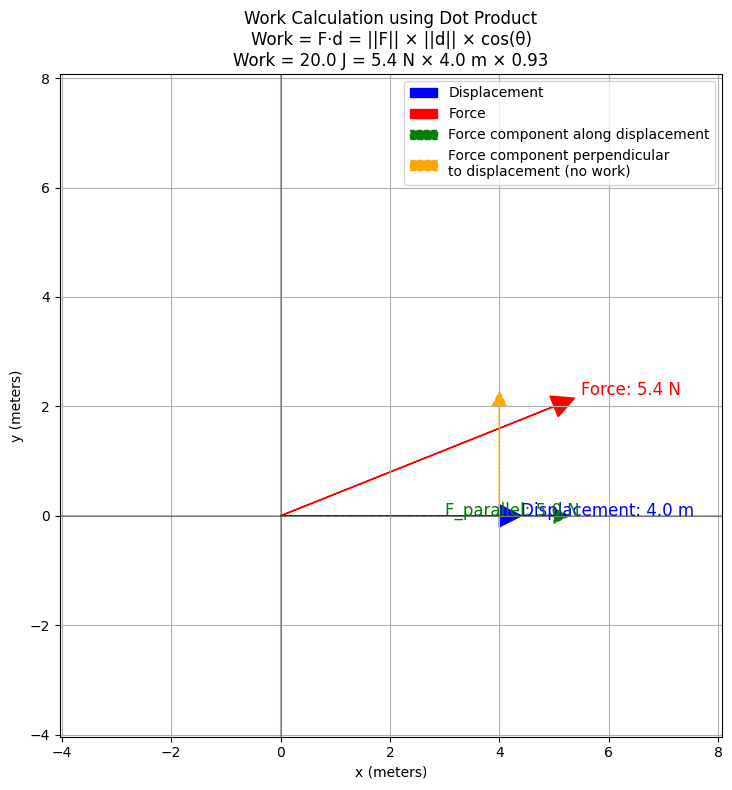

Work done: 20.00 joules
Angle between force and displacement: 21.80 degrees


In [13]:
# Example: Force and displacement vectors
force = torch.tensor([5.0, 2.0])  # 5N, 2N
displacement = torch.tensor([4.0, 0.0])  # 4m in x-direction

work, angle = visualize_work(force, displacement)
print(f"Work done: {work:.2f} joules")
print(f"Angle between force and displacement: {angle:.2f} degrees")


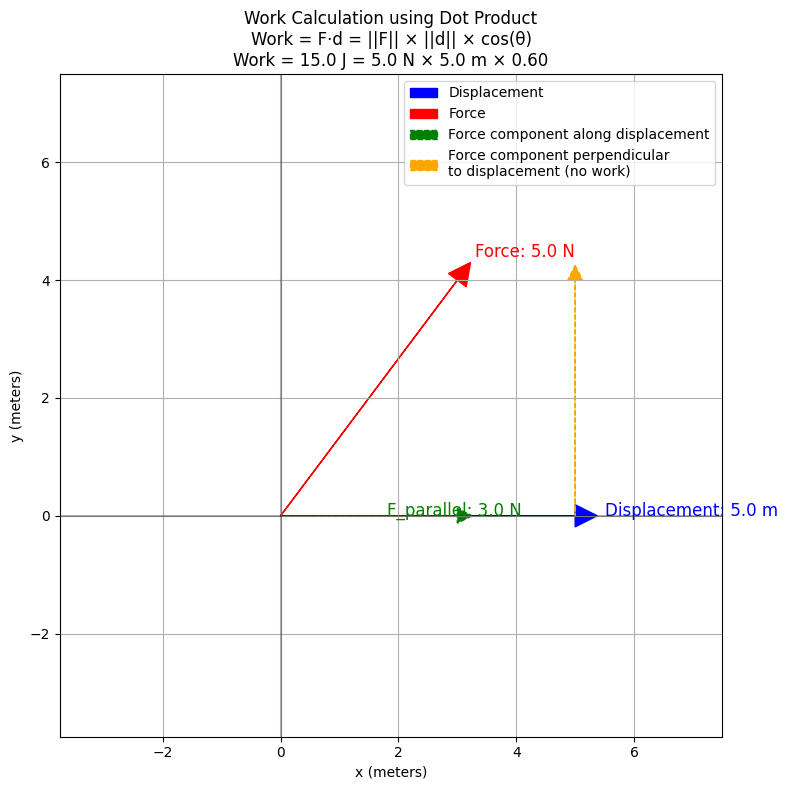

Work done: 15.00 joules
Angle between force and displacement: 53.13 degrees


In [14]:
# Another example: Force at an angle
force2 = torch.tensor([3.0, 4.0])  # 5N at an angle
displacement2 = torch.tensor([5.0, 0.0])  # 5m in x-direction

work2, angle2 = visualize_work(force2, displacement2)
print(f"Work done: {work2:.2f} joules")
print(f"Angle between force and displacement: {angle2:.2f} degrees")


## 2.5 Computing the Angle Between Vectors

The dot product gives us a simple way to compute the angle between any two vectors:

$$\cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{||\vec{a}|| \cdot ||\vec{b}||}$$
#
Let's implement a function to calculate this:


In [15]:
def compute_angle(v1, v2):
    """
    Compute the angle between two vectors in degrees.
    
    Args:
        v1, v2: PyTorch tensors
        
    Returns:
        Angle in degrees
    """
    dot_product = torch.dot(v1, v2)
    norm_product = torch.norm(v1) * torch.norm(v2)
    
    # Avoid numerical issues with very small numbers
    cos_theta = torch.clamp(dot_product / norm_product, -1.0, 1.0)
    angle_rad = torch.acos(cos_theta)
    angle_deg = angle_rad * (180 / torch.pi)
    
    return angle_deg.item()


In [16]:
# Create some vectors to test
vectors = [
    torch.tensor([1.0, 0.0]),  # right
    torch.tensor([0.0, 1.0]),  # up
    torch.tensor([-1.0, 0.0]),  # left
    torch.tensor([0.0, -1.0]),  # down
    torch.tensor([1.0, 1.0]),   # diagonal
    torch.tensor([-1.0, 1.0])   # diagonal
]

names = ["right", "up", "left", "down", "diagonal_1", "diagonal_2"]

# Compute and visualize angles between all pairs
angle_matrix = torch.zeros((len(vectors), len(vectors)))

for i in range(len(vectors)):
    for j in range(len(vectors)):
        angle_matrix[i, j] = compute_angle(vectors[i], vectors[j])


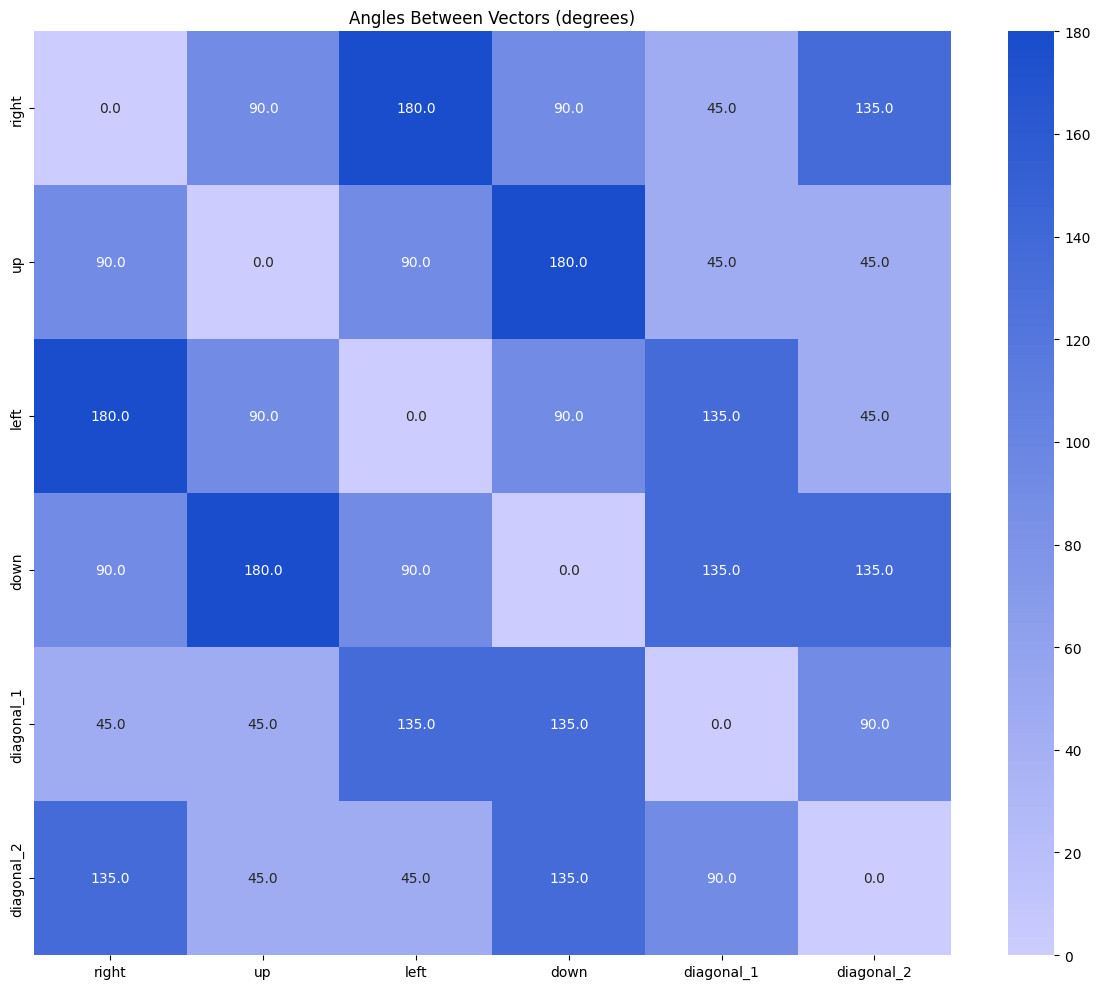

In [17]:
# Visualize the angles
plt.figure(figsize=(12, 10))
sns.heatmap(angle_matrix.numpy(), annot=True, fmt=".1f", cmap=cmap,
            xticklabels=names, yticklabels=names)
plt.title("Angles Between Vectors (degrees)")
plt.tight_layout()
plt.show()


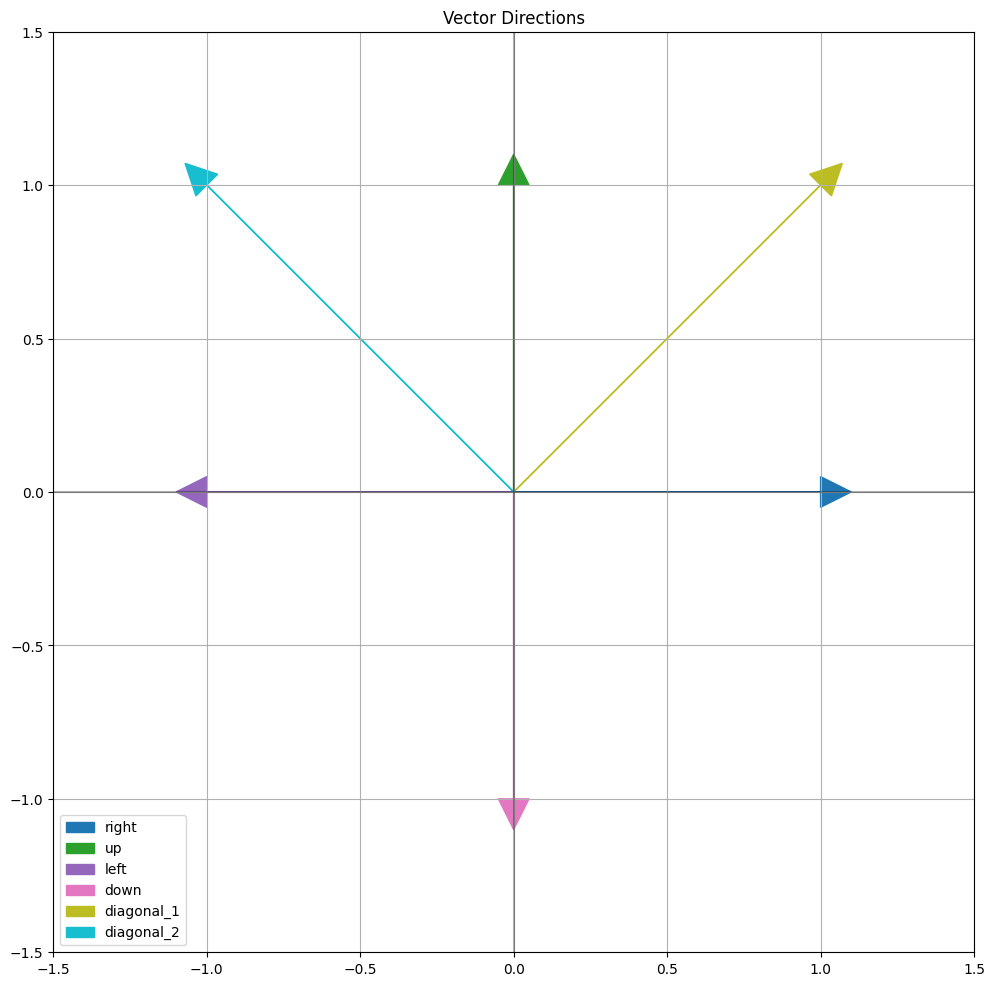

In [18]:
# Visualize the vectors
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)

# Set limits
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Add grid and axes
ax.grid(True)
ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
ax.set_aspect('equal')

# Plot vectors
colors = plt.cm.tab10(np.linspace(0, 1, len(vectors)))
for i, (vec, name) in enumerate(zip(vectors, names)):
    v = vec.numpy()
    ax.arrow(0, 0, v[0], v[1], 
             head_width=0.1, head_length=0.1, 
             fc=colors[i], ec=colors[i], 
             label=name)

# Add legend
ax.legend()
ax.set_title("Vector Directions")
plt.tight_layout()
plt.show()


## 2.6 Conclusion

In this section, we've explored practical applications of vector dot products:

- Document similarity using cosine similarity
- Pattern matching in images
- Work calculation in physics
- Computing angles between vectors

Dot products provide a powerful way to measure similarity, projection, and alignment between vectors, 
making them essential in many fields like machine learning, computer vision, and physics.

In the next section, we'll explore matrix-vector products and their applications.